In this experiment a rat ventricular myocyte was loaded with the $Ca^{2+}$ sensitive indicator fluo-3, and a confocal microscope was used to record changes in intracellular [$Ca^{2+}$]. The microscope was operated in "line scan" mode such that one dimension of the resulting "pseudo-image" is space and the other is time. This cell was also loaded with the $Ca^{2+}$ buffer NP-EGTA. This buffer has unique properties such that when it is exposed to high-intensity ultraviolet light, it loses its ability to bind $Ca^{2+}$. Thus, delivering a pulse of UV light to a cell loaded with NP-EGTA provides a means to rapidly increase [$Ca^{2+}$] by "uncaging" it from the NP-EGTA.

The initial, local increase in [$Ca^{2+}$] in this image results from a spatially localized flash of UV light. The second increase results from electrical stimulation of the cell. The goal is to determine how the increase in [$Ca^{2+}$] due to the flash affects the later increase due to the electrical stimulus. The regions of the cell not exposed to the UV light serve as internal controls.

In [2]:
%matplotlib inline
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

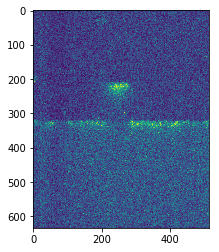

In [3]:
data = mpimg.imread('flash4.jpg')
plt.imshow(data)

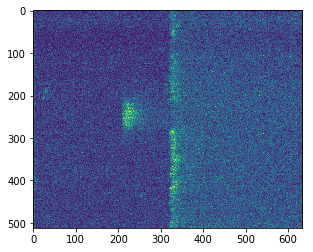

In [7]:
# orient the image
data1 = data.T
plt.imshow(data1)

In [36]:
import numpy as np
flash = np.mean(np.vstack((data1[0:70,], data1[70:,])), axis=0, keepdims=True)
print(flash.shape)

(1, 634)


In [14]:
# control region
noflash = np.mean(data1[70:100,], axis = 0, keepdims=True)
print(noflash.shape)

(1, 634)


In [37]:
# convert to relative changes
R = flash/noflash
print(R.shape)

(1, 634)


In [16]:
# convert to units of ca2+, in nm
Kd = 700
baseline = 100

ca2plus = R * Kd/(Kd /baseline - R + 1)
print(ca2plus.shape)

(1, 634)


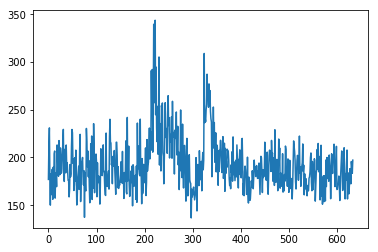

In [38]:
# convert to units of ca2+, in nm
Kd = 1000
baseline = 150

ca2plus = R * Kd/(Kd /baseline - R + 1)
#ca2plus_0 = noflash * Kd/(Kd /baseline - noflash + 1)
times = range(ca2plus.shape[1])
plt.plot(times, ca2plus[0,])
#plt.plot(times, ca2plus_0[0,])

In [43]:
from scipy.io import loadmat
x = loadmat('sampledata2.mat')['data']
x[0:10,] # column 1: ages, column 2: drinks per week, column 3: cancer/nocancer

array([[37.1998435 ,  3.88817188,  0.        ],
       [47.76497549,  2.68104964,  0.        ],
       [28.75141559,  4.23188165,  1.        ],
       [53.60310936,  2.41741706,  1.        ],
       [36.13567282,  8.05412802,  0.        ],
       [41.39629757,  9.03853752,  1.        ],
       [22.92407942,  1.20666201,  1.        ],
       [40.33778486,  3.39155432,  1.        ],
       [15.65342437,  2.11113782,  0.        ],
       [53.70811921,  4.17761579,  1.        ]])

Text(0.5,0.98,'number of drinks in data')

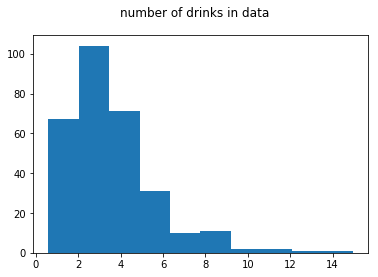

In [45]:
# how many drinks
plt.hist(x[:, 1])
plt.suptitle('number of drinks per week in data')

(array([143.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 157.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

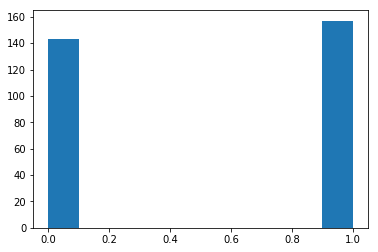

In [46]:
# how many cancer
plt.hist(x[:,2])

(array([ 7., 15., 32., 37., 69., 50., 47., 27., 12.,  4.]),
 array([15.65342437, 20.75618732, 25.85895026, 30.9617132 , 36.06447615,
        41.16723909, 46.27000204, 51.37276498, 56.47552792, 61.57829087,
        66.68105381]),
 <a list of 10 Patch objects>)

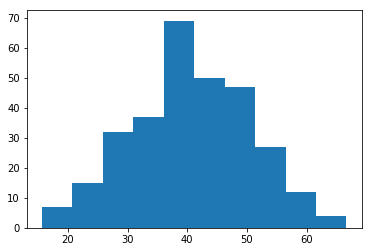

In [47]:
# age dist
plt.hist(x[:,0])

(array([17., 30., 56., 44., 10.]),
 array([20.29333492, 29.5708787 , 38.84842247, 48.12596625, 57.40351003,
        66.68105381]),
 <a list of 5 Patch objects>)

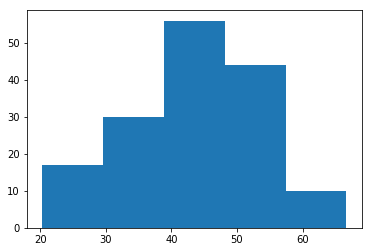

In [54]:
# cancerous patients
index = x[:, 2] == 1
cancer = x[index, 0]# age for cancer
plt.hist(cancer, bins=5)

(array([ 9., 21., 33., 48., 25.,  7.]),
 array([15.65342437, 22.60362026, 29.55381615, 36.50401204, 43.45420793,
        50.40440382, 57.35459971]),
 <a list of 6 Patch objects>)

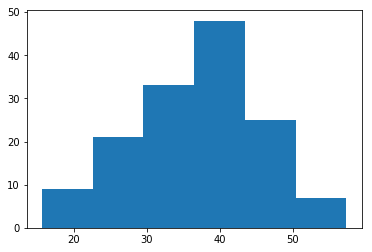

In [57]:
# noncancerous patients
index = x[:, 2] == 0
noncancer = x[index, 0]# age for cancer
plt.hist(noncancer, bins=6)

In [60]:
np.sum(cancer > 45), np.sum(cancer < 45)

(72, 85)

In [62]:
np.sum(noncancer < 35), np.sum(noncancer > 35)

(51, 92)

In [63]:
np.sum(noncancer < 25), np.sum(noncancer > 55)

(12, 2)

In [64]:
np.sum(cancer > 60), np.sum(cancer < 30)

(6, 18)

In [65]:
np.sum(cancer > 35)/len(cancer)

0.802547770700637

In [67]:
np.sum(x[:,0] < 25)/x.shape[0]

0.06

In [68]:
three = x[x[:,1] > 3,:]
np.sum(three[:,2] == 1)/three.shape[0]

0.6459627329192547